In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class GradientDescent:
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.lr = lr
        self.m = None
        self.b = None
        self.losses = []

    def fit(self, X, Y):
        n = len(X)
        self.b = 0
        self.m = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(X, self.m) + self.b
            loss = np.mean((Y - y_hat) ** 2)
            self.losses.append(loss)
            slope_der_b = -2/n * np.sum(Y - y_hat)
            slope_der_m = -2/n * np.dot(X.T, (Y - y_hat))
            self.b -= self.lr * slope_der_b
            self.m -= self.lr * slope_der_m
        print(f"Intercept: {self.b:.2f}, Coefficients: {self.m}")
        
    def predict(self, X):
        return np.dot(X, self.m) + self.b

In [3]:
df = pd.read_csv('Student_Performance.csv')

In [4]:
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [5]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [8]:
model = GradientDescent(epochs=10000, lr=0.005)
model.fit(X_train_scaled, Y_train)

Intercept: 27.16, Coefficients: [28.15575     7.40134079 17.63727127  0.30429076  0.81003107  0.54884171]


In [9]:
y_pred = model.predict(X_test_scaled)

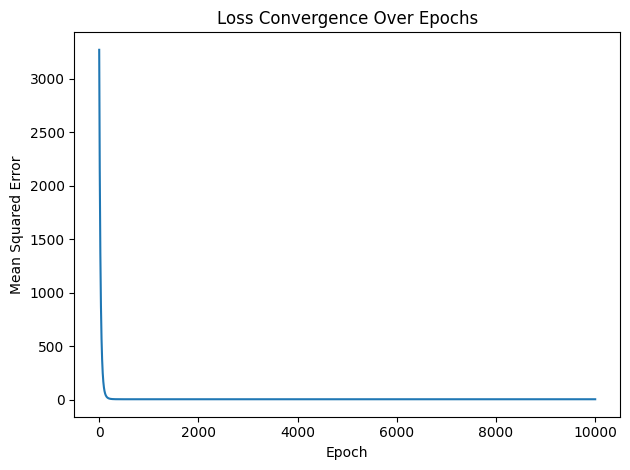

In [10]:
plt.plot(model.losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss Convergence Over Epochs')
plt.tight_layout()
plt.show()

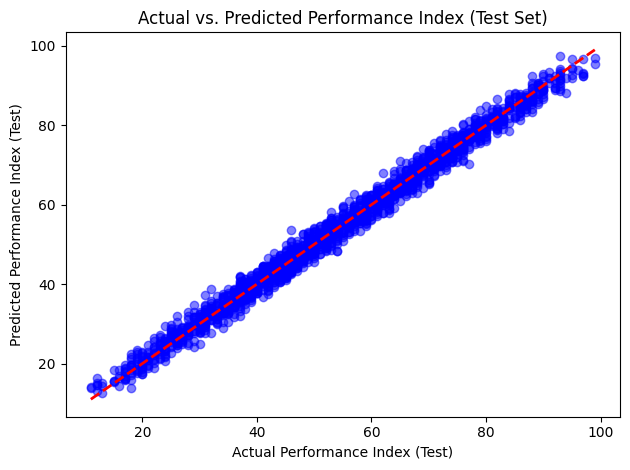

In [11]:
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Performance Index (Test)')
plt.ylabel('Predicted Performance Index (Test)')
plt.title('Actual vs. Predicted Performance Index (Test Set)')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import r2_score

In [13]:
print("R2 Score is : ", r2_score(Y_test, y_pred))

R2 Score is :  0.9889832909573144
